In [ ]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from tqdm import tqdm #use for long cycles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

In [ ]:
texts = pd.read_csv('Spam_text.csv') 
texts

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##Text class to numeric

In [ ]:
texts['Category'] = pd.factorize(texts['Category'])[0]
texts

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


(array([4825.,  747.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

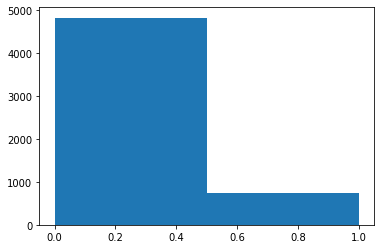

In [ ]:
plt.hist(texts['Category'], 
         bins=2)

##Text preprocessing


In [ ]:
from stop_words import get_stop_words
# https://github.com/Alir3z4/python-stop-words
stop_words = get_stop_words('en')
print(stop_words[:10], len(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and'] 174


In [ ]:
all_words = [] # list for all words in all texts
for row in texts.iterrows():

  text = row[1]['Message']
  clear = re.findall('[a-z]+', text.lower()) # all words in one text

  for word in clear:
    if word in stop_words or len(word) == 1:
      clear.remove(word)

  all_words.extend(clear)
      
  clear = ' '.join(clear)
  texts.loc[row[0], 'Message'] = clear

In [ ]:
from collections import Counter
word_count = Counter(all_words)
word_count.most_common(20)

all_words = [i[0] for i in word_count.most_common(300)]

In [ ]:
unique_words = list(set(all_words))
len(unique_words)

300

In [ ]:
texts

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
one_hot_list = []
# custom one hot encoder
for row in tqdm(texts.iterrows()):
  text = row[1]['Message']
  one_hot_text = [1 if i in text else 0 for i in unique_words]
  one_hot_list.append(one_hot_text)

one_hot_list = np.array(one_hot_list)

5572it [00:00, 8168.92it/s]


In [ ]:
df = pd.DataFrame(one_hot_list, columns = unique_words)
df.insert(loc=0, column='Category', value=texts['Category'])
df

,Category,box,now,told,talk,back,please,line,wanna,later,...,word,keep,we,send,take,class,get,money,life,around
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##Data preparation

In [ ]:
labels = np.array(df['Category'])
data = np.array(df.drop('Category', axis=1))

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.4, random_state=42)
data_train.shape[0], data_test.shape[0]

(3343, 2229)

##Model creation

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(len(unique_words)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 46,914
Trainable params: 46,914
Non-trainable params: 0
_________________________________________________________________


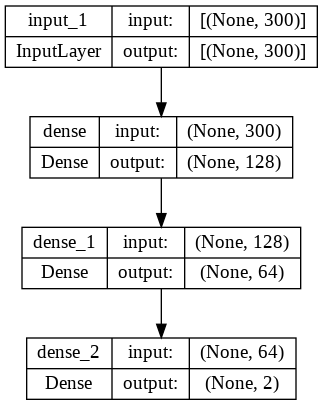

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

##Training

In [ ]:
model.fit(data_train, label_train, epochs=10, batch_size=32)

Epoch 1/10
105/105 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9109
Epoch 2/10
105/105 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9647
Epoch 3/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9749
Epoch 4/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9806
Epoch 5/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9880
Epoch 6/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 7/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9946
Epoch 8/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 9/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9979
Epoch 10/10
105/105 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9985

##Evaluation

In [ ]:
y_pred = model.predict(data_test)
y_pred[0]

70/70 [==============================] - 0s 2ms/step


array([9.9998504e-01, 1.4927857e-05], dtype=float32)

In [ ]:
prediction = np.argmax(y_pred, axis=1)

In [ ]:
print(classification_report(label_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1938
           1       0.91      0.85      0.88       291

    accuracy                           0.97      2229
   macro avg       0.94      0.92      0.93      2229
weighted avg       0.97      0.97      0.97      2229



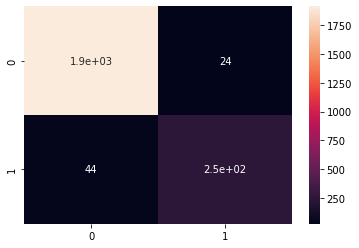

In [ ]:
sn.heatmap(confusion_matrix(label_test, prediction), annot=True)